test if the distribution of ages is the same for 

1) male and femal riders

2) day and night riders

use 3 tests: KS, Pearson's, Spearman's

In [90]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os
import urllib

import scipy.stats
myseed = np.random.seed(2015)

Populating the interactive namespace from numpy and matplotlib


In [31]:
df = pd.read_csv('C:\Users\Maria\SkyDrive\Documents\principles of informatics/201508-citibike-tripdata.csv', header=0)
print data.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [91]:
#df is the dataframe where the content of the csv file is stored - grab subscriber trips by gender and calculate age
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

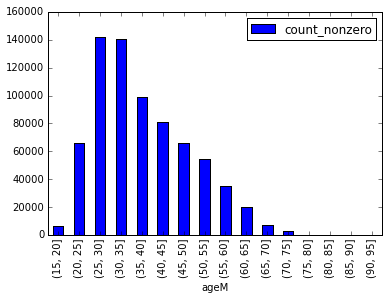

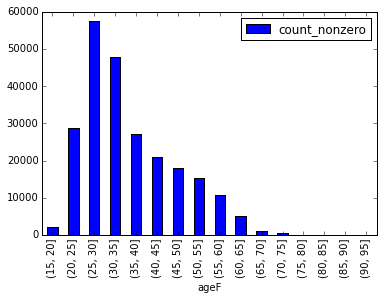

In [93]:
bins = np.arange(15, 99, 5) #started at age 15 because citibike users can be as young as 16, 5 year bins for exploration
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')
#probably can take out users over 75 

          count_nonzero
ageM                   
(15, 20]       0.000755
(20, 25]       0.031607
(25, 30]       0.079080
(30, 35]       0.086715
(35, 40]       0.065389
(40, 45]       0.041519
(45, 50]       0.025401
(50, 55]       0.014859
(55, 60]       0.012054
(60, 65]       0.006234
(65, 70]       0.000976
(70, 75]       0.000055
(75, 80]       0.000345
(80, 85]       0.000086
(85, 90]       0.000001
(90, 95]            NaN


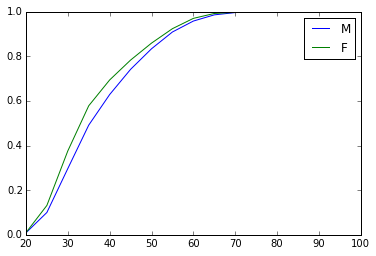

In [94]:
#print df.ageS, df.ageS.cumsum(), normalize for cdf

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

In [96]:
ks=scipy.stats.ks_2samp(df.ageM, df.ageF)
print "KS test results: ", ks

# using alpha=.05, we reject the null hypothesis that these samples came from the same distribution

KS test results:  (0.41112206160245079, 0.0)


In [97]:
#Pearson's test for correlation

ageFemale = np.array(df.ageF[~np.isnan(df.ageF)])

myseed
ageMale = np.random.choice(ageMale, size = 1000, replace = False)

myseed
ageFemale = np.random.choice(ageFemale, size = 1000, replace = False)

print "Pearson's test for corrleation", scipy.stats.pearsonr(ageMale, ageFemale)

# using alpha=.05, we fail to reject the null hypothesis that the distributions are similiar
# this makes sense because the distribtion of trips between men and women is similar when broken down by age range

Pearson's test for corrleation (-0.021614736088188043, 0.49476935258376753)


In [101]:
#Spearman test

print "Spearman test statistic and p-value", scipy.stats.spearmanr(df['ageM'], df['ageF'])

# using alpha=.05, we reject the null hypothesis that a relationship exists between the trips taken by females and males 

Spearman test statistic and p-value (-0.36846038767588418, 0.0)


In [103]:
# Day v Night trips - use timestamp parcer
df['mystart'] = pd.DatetimeIndex(df['starttime']).hour

#trips taken between 6pm and 6am
df['day'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['mystart'] <6) & (df['mystart'] >=18)]

#trips taken between 6pm and 6am
df['night'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['mystart'] <= 6) | (df['mystart'] < 18)]

          count_nonzero
day                    
(15, 20]            NaN
(20, 25]            NaN
(25, 30]            NaN
(30, 35]            NaN
(35, 40]            NaN
(40, 45]            NaN
(45, 50]            NaN
(50, 55]            NaN
(55, 60]            NaN
(60, 65]            NaN
(65, 70]            NaN


AttributeError: 'DataFrame' object has no attribute 'find'

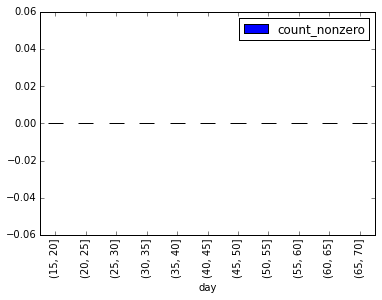

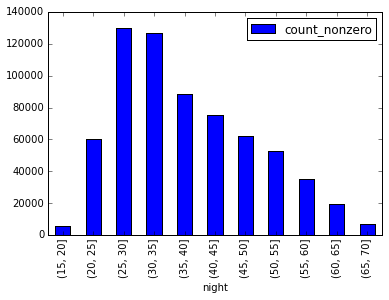

In [105]:
#np.array

bins = np.arange(15, 75, 5) # from the last distribution we found that the proportion of trips taken by users >75 is so small, they are removed from the sample
df.day.groupby(pd.cut(df.day, bins)).agg([count_nonzero]).plot(kind='bar')
df.night.groupby(pd.cut(df.night, bins)).agg([count_nonzero]).plot(kind='bar')

csD=df.day.groupby(pd.cut(df.day, bins)).agg([count_nonzero]).cumsum()

csN=df.night.groupby(pd.cut(df.night, bins)).agg([count_nonzero]).cumsum()

print np.abs(csD / csD.max()-csN / csN.max())

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "DAY")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "NIGHT")
pl.legend()